# 03.Perceptron_iris

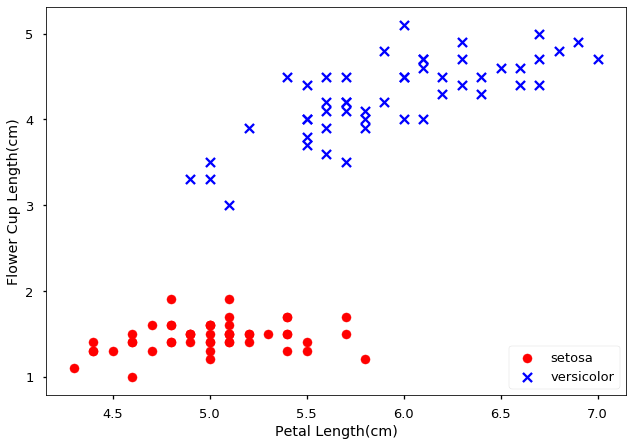

[0.2  1.4  0.94]
[0.   0.8  1.32]
[-0.2  0.2  1.7]
[-0.2   0.32  2.12]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from Perceptron import Perceptron

style.use('seaborn-talk')

# 한국어 사용할 때 쓰는 부분
# krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
# matplotlib.rc('font', **krfont)
# matplotlib.rcParams['axes.unicode_minus'] = False

#아이리스 데이터는 4개의 특성값이 있고, 이 특성값에 따라 꽃받침길이, 꽃받침너비, 꽃임길이, 꽃임너비, 아이리스 품종을 나타낸다.
# 품종은 각 50개씩 있다.(총 150개이고 3개 품종)
if __name__ == '__main__':
    style.use('seaborn-talk')
    
    df = pd.read_csv('iris.data', header=None)
    
    # 100개 파일을 설정한 뒤 'Iris-setosa' 이면 -1 아니면 1을 리턴한다.
    # 아이리스 파일은 0~49는 Iris-setosa 이며, 50~99는 Iris-versicolor 이므로 반쪽은 -1로 설정된다.
    # 원핫 인코딩이라고 보면 된다.
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa',-1,1)
    
    # 아이리스 데이터를 저장한 데이터프레임 0~99라인까지 1번째, 3번째 컬럼의 데이터 값을 numpy 배열로 리턴받아 이를 X에 대입
    # 1번은 꽃받침 길이, 3번은 꽃입길이다
    X = df.iloc[0:100, [0,2]].values
    
    # 이이리스 데이터의 꽃받침길이, 꽃잎길이에 대한 데이터의 상관관계를 알아보기 위해 산점도를 그려봄
    plt.scatter(X[:50,0], X[:50,1], color='r', marker='o', label='setosa')
    plt.scatter(X[50:100,0],X[50:100,1], color='b', marker='x', label='versicolor')
    plt.xlabel('Petal Length(cm)')
    plt.ylabel('Flower Cup Length(cm)')
    plt.legend(loc=4)
    plt.show()
    
    ppn1 = Perceptron(eta=0.1)
    ppn1.fit(X,y)
    print(ppn1.errors_)

In [2]:
# 머신러닝 결과
# -0.4 + (-0.7) * 꽃받침길이 + 1.84 * 꽃잎길이 의 값이 0보다 작거나 같으면 Iris-setosa 이고 아니면 Iris-versicolor다.